In [1]:
import numpy as np
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt

In [2]:
# X, y = dt.load_iris(return_X_y=True)
X, y = make_classification(n_samples=1000, n_features=38, n_redundant=0, n_informative=16, n_classes=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0, shuffle=True)

In [3]:
from LVQ.lvq import LVQ3

In [4]:
lvq = LVQ3(epsilon=0.2, epoch=200)

In [5]:
model = lvq.fit(X_train, y_train)

In [6]:
result = lvq.predict(X_test)

In [7]:
accuracy_score(result, y_test)

0.935

In [8]:
from LVQ.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X, y = dt.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
# X, y = make_classification(n_samples=200, n_features=38, n_redundant=0, n_informative=20, n_classes=3, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

one = OneVsRestClassifier(LVQ3(random_state=0, epoch=350, alpha=0.65, beta=0.2, m=0.25,epsilon=0.35))
one.fit(X_train, y_train)

In [9]:
result = one.predict(X_test)

In [10]:
accuracy_score(result, y_test)

0.5666666666666667

In [11]:
digits = dt.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

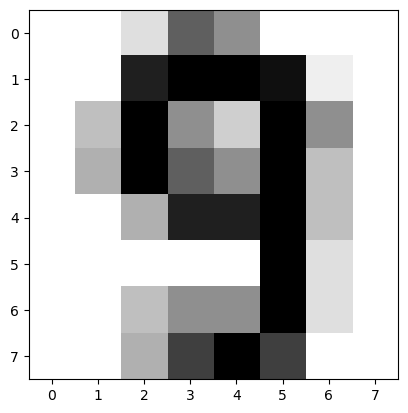

In [12]:
fig = plt.figure
plt.imshow(digits.images[-2], cmap='gray_r')
plt.show()

In [13]:
digits.target[-2]

9

In [14]:
X = digits.data
Y = digits.target
X, Y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [15]:
x_train, x_test, y_train, y_test = tts(X, Y, shuffle=False, test_size=0.3)

In [16]:
lvq_digit = LVQ3(epsilon=0.3, alpha=0.2, beta=0.5,epoch=500)
lvq_digit.fit(x_train, y_train)

In [17]:
lvq_digit.weight

array([[-8.08690088e-01,  3.59683445e-01, -7.33112656e-02,
        -1.02518235e-01,  5.44660214e-01,  1.48345223e-01,
        -7.45169224e-01,  5.42667529e-01,  8.02374888e-01,
        -3.93457400e-01, -4.92873526e-02, -6.73013254e-02,
         9.27357102e-01,  2.01623547e-01, -3.39770704e-01,
         6.71014467e-01,  1.78538119e-01, -5.53808835e-01,
        -8.66103897e-01, -1.38103895e-01,  4.54117482e-01,
         3.72574269e-01, -4.00646734e-01, -4.12487968e-01,
        -3.88889873e-01, -6.82842157e-02, -9.86443999e-01,
         9.52511711e-01,  6.24636801e-01, -5.55126786e-01,
        -9.96794640e-01,  2.52043845e-01, -3.78619862e-01,
        -4.05132923e-01,  7.24623239e-01, -6.11047763e-01,
        -2.94140540e-01, -1.77686007e-01, -3.35745727e-03,
         9.39133123e-01, -3.72361092e-01, -3.28723444e-01,
        -9.98719452e-01, -3.95475606e-01, -2.43221137e-01,
         6.50888790e-01, -8.16838129e-02, -8.88422509e-01,
         8.91806667e-01, -1.32222967e-01,  7.77608792e-0

In [18]:
result = lvq_digit.predict(x_test)

In [19]:
result

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [20]:
accuracy_score(result, y_test)

0.09814814814814815